In [1]:
import numpy as np 
import pandas as pd

import os

In [2]:
!pip install wolta

In [3]:
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Features_Train.csv')

In [4]:
df.head()

,ID,Annulus_N.voxels,Annulus_SNS_vol,Annulus_SNS_area,Annulus_SNS_s2v,Annulus_SNS_sph,Annulus_SNS_sph_dis,Annulus_SNS_com_1,Annulus_SNS_com_2,Annulus_SNS_max3d,...,Lesion_GLCM_sumEnt_HHH_25HUgl,Lesion_GLCM_difVar_HHH_25HUgl,Lesion_GLCM_difEnt_HHH_25HUgl,Lesion_GLCM_AutoCorrel_HHH_25HUgl,Lesion_GLCM_ClTend_HHH_25HUgl,Lesion_GLCM_Homoge1_HHH_25HUgl,Lesion_GLCM_IDMN_HHH_25HUgl,Lesion_GLCM_IDN_HHH_25HUgl,Lesion_GLCM_invVar_HHH_25HUgl,Outcome
0,0001_1,1504,1504,3364,2.236702,0.188709,5.299155,3.779511,0.006720,21,...,1.456343,0.516489,1.478822,12.359264,1.122325,0.672912,0.972564,0.898164,0.519051,0
1,0003_1,1007,1007,2224,2.208540,0.218459,4.577528,3.334505,0.010426,16,...,1.462379,0.535239,1.502895,12.134616,1.132018,0.675078,0.971933,0.898085,0.502191,0
2,0004_1,2160,2160,4322,2.000926,0.186969,5.348493,4.592921,0.006536,17,...,1.050196,0.245968,0.988000,2.261923,0.527141,0.763604,0.905442,0.842403,0.472791,1
3,0005_1,1568,1568,3276,2.089286,0.199237,5.019137,4.010592,0.007909,23,...,1.157852,0.299988,1.146312,6.241820,0.605958,0.733500,0.965438,0.891646,0.504706,1
4,0006_1,779,779,1702,2.184852,0.240556,4.157036,3.083113,0.013920,14,...,1.414994,0.484908,1.434273,6.282063,1.046868,0.692436,0.964913,0.889447,0.487179,0


In [5]:
df.shape

(609, 2000)

In [6]:
df.columns

Index(['ID', 'Annulus_N.voxels', 'Annulus_SNS_vol', 'Annulus_SNS_area',
       'Annulus_SNS_s2v', 'Annulus_SNS_sph', 'Annulus_SNS_sph_dis',
       'Annulus_SNS_com_1', 'Annulus_SNS_com_2', 'Annulus_SNS_max3d',
       ...
       'Lesion_GLCM_sumEnt_HHH_25HUgl', 'Lesion_GLCM_difVar_HHH_25HUgl',
       'Lesion_GLCM_difEnt_HHH_25HUgl', 'Lesion_GLCM_AutoCorrel_HHH_25HUgl',
       'Lesion_GLCM_ClTend_HHH_25HUgl', 'Lesion_GLCM_Homoge1_HHH_25HUgl',
       'Lesion_GLCM_IDMN_HHH_25HUgl', 'Lesion_GLCM_IDN_HHH_25HUgl',
       'Lesion_GLCM_invVar_HHH_25HUgl', 'Outcome'],
      dtype='object', length=2000)

In [7]:
from wolta.data_tools import col_types

types = col_types(df)
str_types = 0

for t in types:
    if t == 'str':
        str_types += 1

print(str_types)

1


In [8]:
from wolta.data_tools import seek_null

seeked = seek_null(df, print_columns=True)

In [9]:
from wolta.feature_tools import list_deletings

df = list_deletings(df, extra=['ID'])

The maximum tolerated null value amount is 121
The maximum tolerated unique value amount is 60 in string data


In [10]:
df.describe()

,Annulus_N.voxels,Annulus_SNS_vol,Annulus_SNS_area,Annulus_SNS_s2v,Annulus_SNS_sph,Annulus_SNS_sph_dis,Annulus_SNS_com_1,Annulus_SNS_com_2,Annulus_SNS_max3d,Annulus_FOS_CV,...,Lesion_GLCM_sumEnt_HHH_25HUgl,Lesion_GLCM_difVar_HHH_25HUgl,Lesion_GLCM_difEnt_HHH_25HUgl,Lesion_GLCM_AutoCorrel_HHH_25HUgl,Lesion_GLCM_ClTend_HHH_25HUgl,Lesion_GLCM_Homoge1_HHH_25HUgl,Lesion_GLCM_IDMN_HHH_25HUgl,Lesion_GLCM_IDN_HHH_25HUgl,Lesion_GLCM_invVar_HHH_25HUgl,Outcome
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,...,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,1259.469622,1259.469622,2671.569787,2.165722,0.223115,4.614327,3.522902,0.012112,18.103448,-0.333170,...,1.281782,0.618323,1.287216,10.695236,1.418486,0.702979,0.944430,0.871894,0.486159,0.500821
std,781.059290,781.059290,1571.402171,0.123275,0.038307,0.790806,0.799681,0.006447,5.289090,0.268983,...,0.339138,1.572550,0.427157,25.299462,3.989490,0.084832,0.029017,0.026497,0.042954,0.500410
min,215.000000,215.000000,512.000000,1.873045,0.128838,2.950033,1.792757,0.002139,9.000000,-2.182830,...,0.918579,0.213436,0.888238,1.892398,0.444633,0.250460,0.885065,0.778880,0.173105,0.000000
25%,689.000000,689.000000,1534.000000,2.071782,0.195504,4.059633,2.922992,0.007472,14.000000,-0.431585,...,1.052084,0.247663,0.993229,2.303307,0.527072,0.673312,0.907163,0.844430,0.476038,0.000000
50%,1075.000000,1075.000000,2320.000000,2.154535,0.220222,4.540879,3.481298,0.010680,18.000000,-0.257204,...,1.135323,0.293510,1.118035,6.233043,0.603781,0.736605,0.956450,0.876571,0.492930,1.000000
75%,1640.000000,1640.000000,3468.000000,2.250811,0.246328,5.114993,4.066343,0.014947,21.000000,-0.152926,...,1.419896,0.503024,1.453010,11.811023,1.078765,0.758378,0.968956,0.895261,0.507205,1.000000
max,6444.000000,6444.000000,12998.000000,2.706383,0.338979,7.761674,6.576521,0.038951,49.000000,-0.028729,...,3.252818,20.760398,3.890828,379.332602,52.683102,0.792590,0.988609,0.935046,0.551091,1.000000


<AxesSubplot:ylabel='Outcome'>

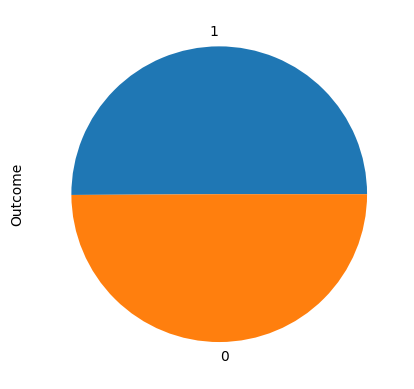

In [11]:
df['Outcome'].value_counts().plot(kind='pie')

In [12]:
y = df['Outcome'].values
del df['Outcome']
X = df.values
del df

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
del X, y

In [14]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_test))

Counter({1: 244, 0: 243})
Counter({0: 61, 1: 61})


In [15]:
from wolta.model_tools import compare_models

results = compare_models('clf',
                        ['ada', 'cat', 'lbm', 'raf', 'dtr', 'ext', 'rdg', 'per'],
                        ['acc', 'precision', 'recall', 'f1'],
                        X_train, y_train, X_test, y_test,
                        get_result=True)

AdaBoost
Accuracy Score: 0.7622950819672131
Precision Score: 0.7711111111111111
Recall Score: 0.7622950819672131
F1 Score (weighted): 0.7603468129783919
***
CatBoost
Accuracy Score: 0.8032786885245902
Precision Score: 0.811654239160453
Recall Score: 0.8032786885245902
F1 Score (weighted): 0.8019480519480521
***
LightGBM
Accuracy Score: 0.8442622950819673
Precision Score: 0.8465909090909091
Recall Score: 0.8442622950819673
F1 Score (weighted): 0.8440002691971196
***
Random Forest
Accuracy Score: 0.7868852459016393
Precision Score: 0.7919059338255401
Recall Score: 0.7868852459016393
F1 Score (weighted): 0.7859649122807018
***
Decision Tree
Accuracy Score: 0.6885245901639344
Precision Score: 0.6961140620631814
Recall Score: 0.6885245901639344
F1 Score (weighted): 0.6854816824966078
***
Extra Tree
Accuracy Score: 0.6311475409836066
Precision Score: 0.6576227390180879
Recall Score: 0.6311475409836066
F1 Score (weighted): 0.6149800126236061
***


C:\Users\dell\anaconda3\envs\rstudio\lib\site-packages\sklearn\linear_model\_ridge.py:197: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


Ridge
Accuracy Score: 0.5655737704918032
Precision Score: 0.5655913978494623
Recall Score: 0.5655737704918032
F1 Score (weighted): 0.5655445810656453
***
Perceptron
Accuracy Score: 0.4098360655737705
Precision Score: 0.31204481792717087
Recall Score: 0.4098360655737705
F1 Score (weighted): 0.32159406858202044
***


In [16]:
from wolta.model_tools import get_best_model

model = get_best_model(results, 'acc', 'clf', X_train, y_train, behavior='max-best')
y_pred = model.predict(X_test)

Best Algorithm is lbm with the score of 0.8442622950819673


In [17]:
from sklearn.metrics import classification_report as rep

print(rep(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        61
           1       0.88      0.80      0.84        61

    accuracy                           0.84       122
   macro avg       0.85      0.84      0.84       122
weighted avg       0.85      0.84      0.84       122



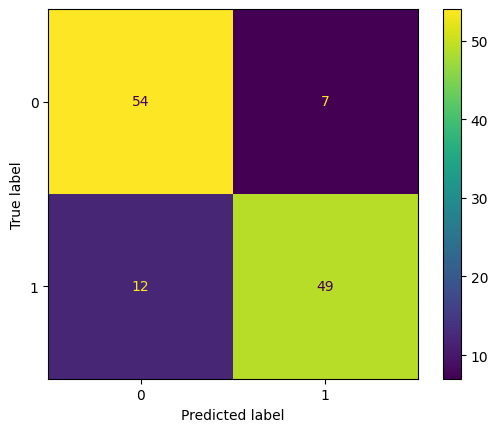

In [18]:
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cm = conf(y_test, y_pred)
disp = cmd(confusion_matrix=cm)
disp.plot()